In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"data\raw_data.csv")

In [4]:
data.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2022-12-01 07:45:00,9.452,13085.0,United Kingdom
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2022-12-01 07:45:00,9.180,13085.0,United Kingdom
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2022-12-01 07:45:00,9.180,13085.0,United Kingdom
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2022-12-01 07:45:00,2.856,13085.0,United Kingdom
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2022-12-01 07:45:00,1.700,13085.0,United Kingdom


In [5]:
data.drop(columns='Unnamed: 0',inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [7]:
data.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,6.376815,15360.645478
std,107.424110,198.732603,1680.811316
min,-9600.000000,-72888.329600,12346.000000
25%,1.000000,1.700000,13983.000000
50%,3.000000,2.856000,15311.000000
75%,10.000000,5.725600,16799.000000
max,19152.000000,34151.082400,18287.000000


## Data Cleaning


In [8]:
cleaned_data= data.copy()

In [9]:
# remove negative quantities 

cleaned_data = cleaned_data.drop(cleaned_data[cleaned_data['Quantity'] < 0].index)

In [10]:
# Remove where price is less or = to 0
cleaned_data= cleaned_data.drop(cleaned_data[cleaned_data['Price']<=0].index)



In [11]:
# Remove null values

cleaned_data.dropna(subset=['Customer ID'], inplace=True)

In [12]:
cleaned_data.describe()

,Quantity,Price,Customer ID
count,407664.000000,407664.000000,407664.000000
mean,13.585585,4.480436,15368.592598
std,96.840747,47.270832,1679.762138
min,1.000000,0.001360,12346.000000
25%,2.000000,1.700000,13997.000000
50%,5.000000,2.652000,15321.000000
75%,12.000000,5.100000,16812.000000
max,19152.000000,14896.760000,18287.000000


In [13]:
cleaned_data.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2022-12-01 07:45:00,9.452,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2022-12-01 07:45:00,9.180,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2022-12-01 07:45:00,9.180,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2022-12-01 07:45:00,2.856,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2022-12-01 07:45:00,1.700,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2022-12-01 07:45:00,2.244,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2022-12-01 07:45:00,1.700,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2022-12-01 07:45:00,8.092,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2022-12-01 07:46:00,3.468,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2022-12-01 07:46:00,5.100,13085.0,United Kingdom


In [14]:
# Check Invoice format
is_six_digits = cleaned_data[cleaned_data['Invoice'].astype(str).str.fullmatch(r'^\d{6}$')==False]




In [15]:
# Check Stock code format

is_five_digits= cleaned_data[(cleaned_data['StockCode'].astype(str).str.fullmatch("^\\d{5}$")==False) & (cleaned_data['StockCode'].astype(str).str.fullmatch("^\\d{5}['a-zA-Z']$")==False)]
is_five_digits

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2022-12-01 09:28:00,24.480,12682.0,France
126,489444,POST,POSTAGE,1,2022-12-01 09:55:00,191.760,12636.0,USA
173,489447,POST,POSTAGE,1,2022-12-01 10:10:00,176.800,12362.0,Belgium
572,489522,79323LP,LIGHT PINK CHERRY LIGHTS,1,2022-12-01 11:45:00,9.180,15998.0,United Kingdom
613,489526,15056BL,EDWARDIAN PARASOL BLACK,6,2022-12-01 11:50:00,8.092,12533.0,Germany
...,...,...,...,...,...,...,...,...
522974,538003,POST,POSTAGE,8,2023-12-09 12:05:00,24.480,12429.0,Denmark
523064,538008,POST,POSTAGE,5,2023-12-09 12:17:00,24.480,12683.0,France
524462,538093,15056BL,EDWARDIAN PARASOL BLACK,12,2023-12-09 14:49:00,8.092,12682.0,France
524491,538093,POST,POSTAGE,5,2023-12-09 14:49:00,24.480,12682.0,France


In [16]:
#Remove Stock coded not in correct format
cleaned_data['StockCode']= cleaned_data['StockCode'].astype(str)

mask=(
     
    (cleaned_data['StockCode'].str.match("^\\d{5}$")==True)
    | (cleaned_data['StockCode'].str.match("^\\d{5}['a-zA-Z']$")==True)
    | (cleaned_data['StockCode'].str.match("^PADS$")==True)

  )
cleaned_data= cleaned_data[mask]



In [17]:
len(cleaned_data)/ len(data)

0.7717547068193453

#### 77% of data was kept during cleaning

## Feature Engineering

In [18]:
cleaned_data['Sales']= cleaned_data['Quantity']* cleaned_data['Price']


In [19]:
cleaned_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2022-12-01 07:45:00,9.452,13085.0,United Kingdom,113.424
1,489434,79323P,PINK CHERRY LIGHTS,12,2022-12-01 07:45:00,9.180,13085.0,United Kingdom,110.160
2,489434,79323W,WHITE CHERRY LIGHTS,12,2022-12-01 07:45:00,9.180,13085.0,United Kingdom,110.160
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2022-12-01 07:45:00,2.856,13085.0,United Kingdom,137.088
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2022-12-01 07:45:00,1.700,13085.0,United Kingdom,40.800
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2023-12-09 20:01:00,4.012,17530.0,United Kingdom,8.024
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2023-12-09 20:01:00,5.100,17530.0,United Kingdom,5.100
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2023-12-09 20:01:00,5.100,17530.0,United Kingdom,5.100
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2023-12-09 20:01:00,5.100,17530.0,United Kingdom,10.200


In [20]:
agg_data= cleaned_data.groupby(by='Customer ID', as_index=False) \
     .agg(
         MonetaryValue=('Sales', 'sum'),
         Frequency= ('Invoice', 'nunique'),
         LastInvoice=('InvoiceDate', 'max')
     ) 
   

In [21]:
agg_data['LastInvoice'] = pd.to_datetime(agg_data['LastInvoice'])
max_invoice_date= agg_data['LastInvoice'].max()

agg_data['Recency']= (max_invoice_date- agg_data['LastInvoice']).dt.days

In [22]:
agg_data 

,Customer ID,MonetaryValue,Frequency,LastInvoice,Recency
0,12346.0,222.2376,2,2023-06-28 13:53:00,164
1,12347.0,1799.7152,2,2023-12-07 14:57:00,2
2,12348.0,300.7776,1,2023-09-27 14:59:00,73
3,12349.0,3020.7504,2,2023-10-28 08:23:00,42
4,12351.0,409.2648,1,2023-11-29 15:23:00,10
...,...,...,...,...,...
4280,18283.0,872.8072,6,2023-11-22 15:30:00,17
4281,18284.0,559.8848,1,2023-10-04 11:33:00,66
4282,18285.0,512.7200,1,2023-02-17 10:24:00,295
4283,18286.0,1695.1448,2,2023-08-20 11:57:00,111


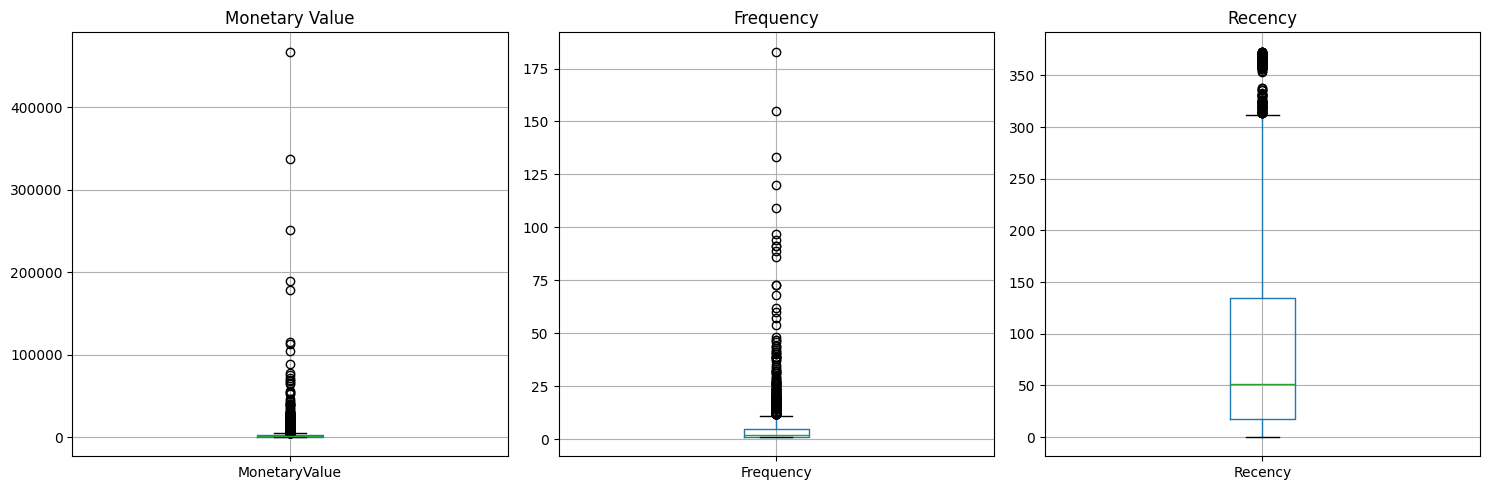

In [ ]:
# Boxplots to show outliers

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplots
agg_data [['MonetaryValue']].boxplot(ax=axes[0])
axes[0].set_title('Monetary Value')

agg_data [['Frequency']].boxplot(ax=axes[1])
axes[1].set_title('Frequency')

agg_data [['Recency']].boxplot(ax=axes[2])
axes[2].set_title('Recency')

plt.tight_layout()
plt.show()

In [ ]:
# Handling Outliers

M_Q1 = agg_data['MonetaryValue'].quantile(0.25)
M_Q3 = agg_data['MonetaryValue'].quantile(0.75)

M_IQR = M_Q3 -M_Q1

monValue_outlier = agg_data[agg_data['MonetaryValue']> M_Q3 + (1.5*M_IQR)].copy()


In [30]:
F_Q1 = agg_data['Frequency'].quantile(0.25)
F_Q3 = agg_data['Frequency'].quantile(0.75)

F_IQR = F_Q3 -F_Q1

frequency_outlier = agg_data[agg_data['Frequency']> F_Q3 + (1.5*F_IQR)].copy()

In [33]:
# Create seperate dataframe for non outliers

data_noneOutliers= agg_data[(~agg_data.index.isin(monValue_outlier.index) ) & (~agg_data.index.isin(frequency_outlier.index) )]
data_noneOutliers

,Customer ID,MonetaryValue,Frequency,LastInvoice,Recency
0,12346.0,222.2376,2,2023-06-28 13:53:00,164
1,12347.0,1799.7152,2,2023-12-07 14:57:00,2
2,12348.0,300.7776,1,2023-09-27 14:59:00,73
3,12349.0,3020.7504,2,2023-10-28 08:23:00,42
4,12351.0,409.2648,1,2023-11-29 15:23:00,10
...,...,...,...,...,...
4280,18283.0,872.8072,6,2023-11-22 15:30:00,17
4281,18284.0,559.8848,1,2023-10-04 11:33:00,66
4282,18285.0,512.7200,1,2023-02-17 10:24:00,295
4283,18286.0,1695.1448,2,2023-08-20 11:57:00,111


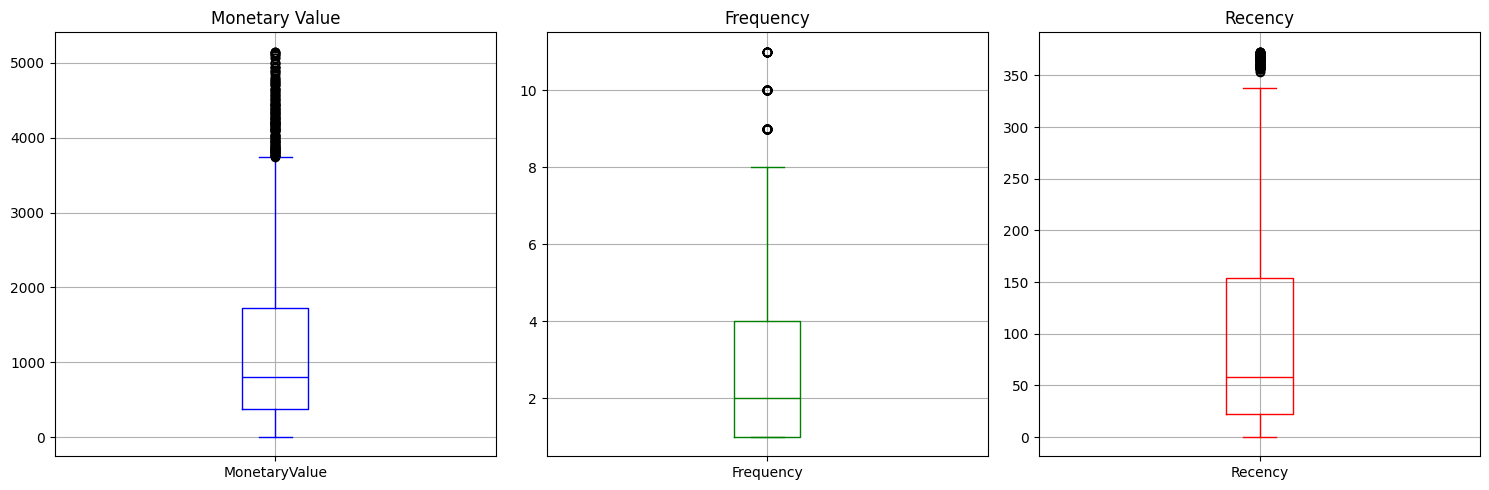

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplots
data_noneOutliers [['MonetaryValue']].boxplot(ax=axes[0], color= 'Blue')
axes[0].set_title('Monetary Value')

data_noneOutliers [['Frequency']].boxplot(ax=axes[1], color='Green')
axes[1].set_title('Frequency')

data_noneOutliers [['Recency']].boxplot(ax=axes[2], color='Red')
axes[2].set_title('Recency')

plt.tight_layout()
plt.show()

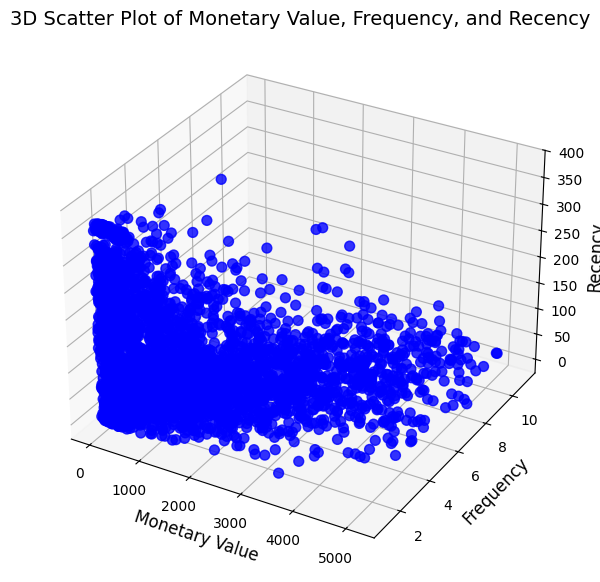

In [36]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(data_noneOutliers["MonetaryValue"], data_noneOutliers["Frequency"], data_noneOutliers["Recency"], c='blue', marker='o', s=50, alpha=0.8)

# Add labels and title
ax.set_title("3D Scatter Plot of Monetary Value, Frequency, and Recency", fontsize=14)
ax.set_xlabel("Monetary Value", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_zlabel("Recency", fontsize=12)

# Show the plot
plt.show()


### Data preprocessing 

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data= scaler.fit_transform(data_noneOutliers[['MonetaryValue','Frequency','Recency']])

In [42]:
scaled_df = pd.DataFrame(scaled_data, index=data_noneOutliers.index, columns=['MonetaryValue', 'Frequency', 'Recency'])

In [44]:
scaled_df

,MonetaryValue,Frequency,Recency
0,-0.882848,-0.385318,0.682450
1,0.537379,-0.385318,-0.969322
2,-0.812138,-0.830978,-0.245397
3,1.636695,-0.385318,-0.561477
4,-0.714465,-0.830978,-0.887753
...,...,...,...
4280,-0.297131,1.397319,-0.816380
4281,-0.578859,-0.830978,-0.316770
4282,-0.621323,-0.830978,2.018142
4283,0.443232,-0.385318,0.142055


## K-means Clustering


In [43]:
from sklearn.cluster import KMeans

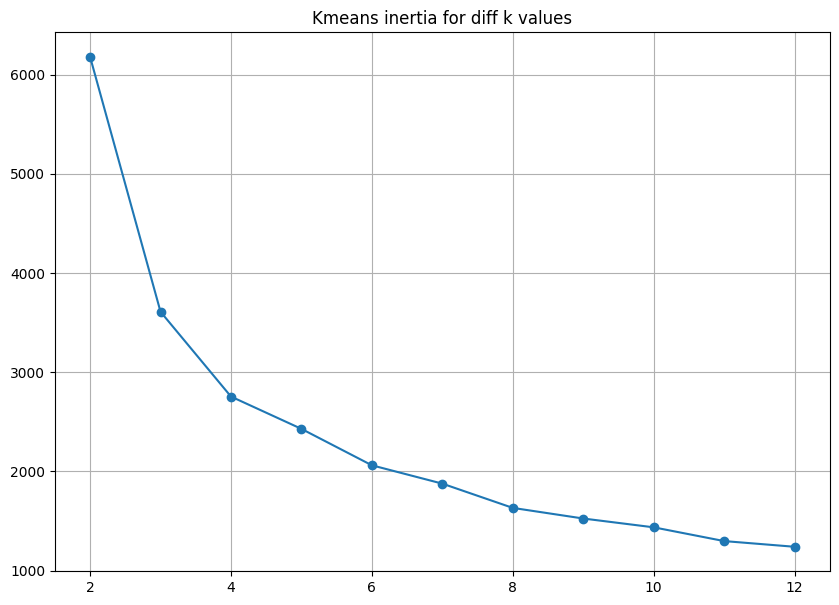

In [47]:
max_k =12
k_values= range(2, max_k+1)
inertia=[]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42,max_iter=1000)
    kmeans.fit_predict(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,7))    

plt.plot(k_values, inertia, marker='o')
plt.title("Kmeans inertia for diff k values")
plt.grid(True)
plt.show()

In [56]:
kmeans = KMeans(n_clusters=4, random_state=42,max_iter=1000)
cluster_labels= kmeans.fit_predict(scaled_df)
data_noneOutliers['Cluster']= cluster_labels

C:\Users\rashe\AppData\Local\Temp\ipykernel_5344\2799190159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_noneOutliers['Cluster']= cluster_labels


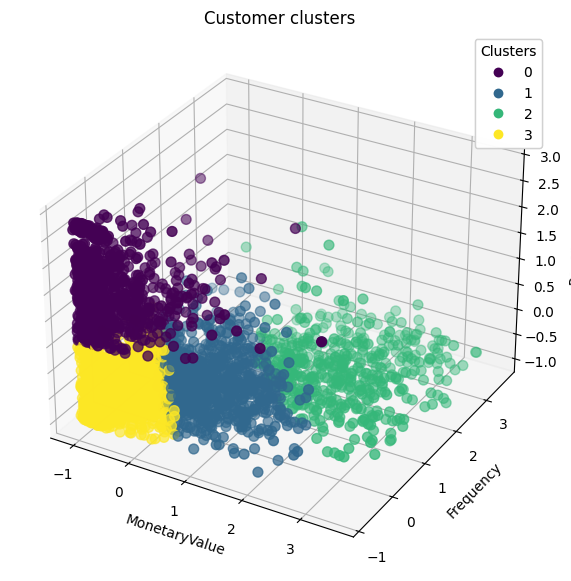

In [54]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'scaled_df' is a dataframe or 2D array with at least 3 features.
# Replace 'Feature1', 'Feature2', 'Feature3' with the actual column names or indices.

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111, projection='3d')

# Extracting three features for visualization
x = scaled_df.iloc[:, 0]  # First feature
y = scaled_df.iloc[:, 1]  # Second feature
z = scaled_df.iloc[:, 2]  # Third feature

# Plotting clusters with different colors
scatter = ax.scatter(x, y, z, c=cluster_labels, cmap='viridis', s=50)

# Adding labels and title
ax.set_xlabel('MonetaryValue')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('Customer clusters')

# Add legend for clarity
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

In [57]:
data_noneOutliers

,Customer ID,MonetaryValue,Frequency,LastInvoice,Recency,Cluster
0,12346.0,222.2376,2,2023-06-28 13:53:00,164,0
1,12347.0,1799.7152,2,2023-12-07 14:57:00,2,1
2,12348.0,300.7776,1,2023-09-27 14:59:00,73,3
3,12349.0,3020.7504,2,2023-10-28 08:23:00,42,1
4,12351.0,409.2648,1,2023-11-29 15:23:00,10,3
...,...,...,...,...,...,...
4280,18283.0,872.8072,6,2023-11-22 15:30:00,17,1
4281,18284.0,559.8848,1,2023-10-04 11:33:00,66,3
4282,18285.0,512.7200,1,2023-02-17 10:24:00,295,0
4283,18286.0,1695.1448,2,2023-08-20 11:57:00,111,1


C:\Users\rashe\AppData\Local\Temp\ipykernel_5344\3037024377.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='MonetaryValue', data=data_noneOutliers, palette='viridis')
C:\Users\rashe\AppData\Local\Temp\ipykernel_5344\3037024377.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='Frequency', data=data_noneOutliers, palette='viridis')
C:\Users\rashe\AppData\Local\Temp\ipykernel_5344\3037024377.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='Recency', data=data_noneOutliers, pale

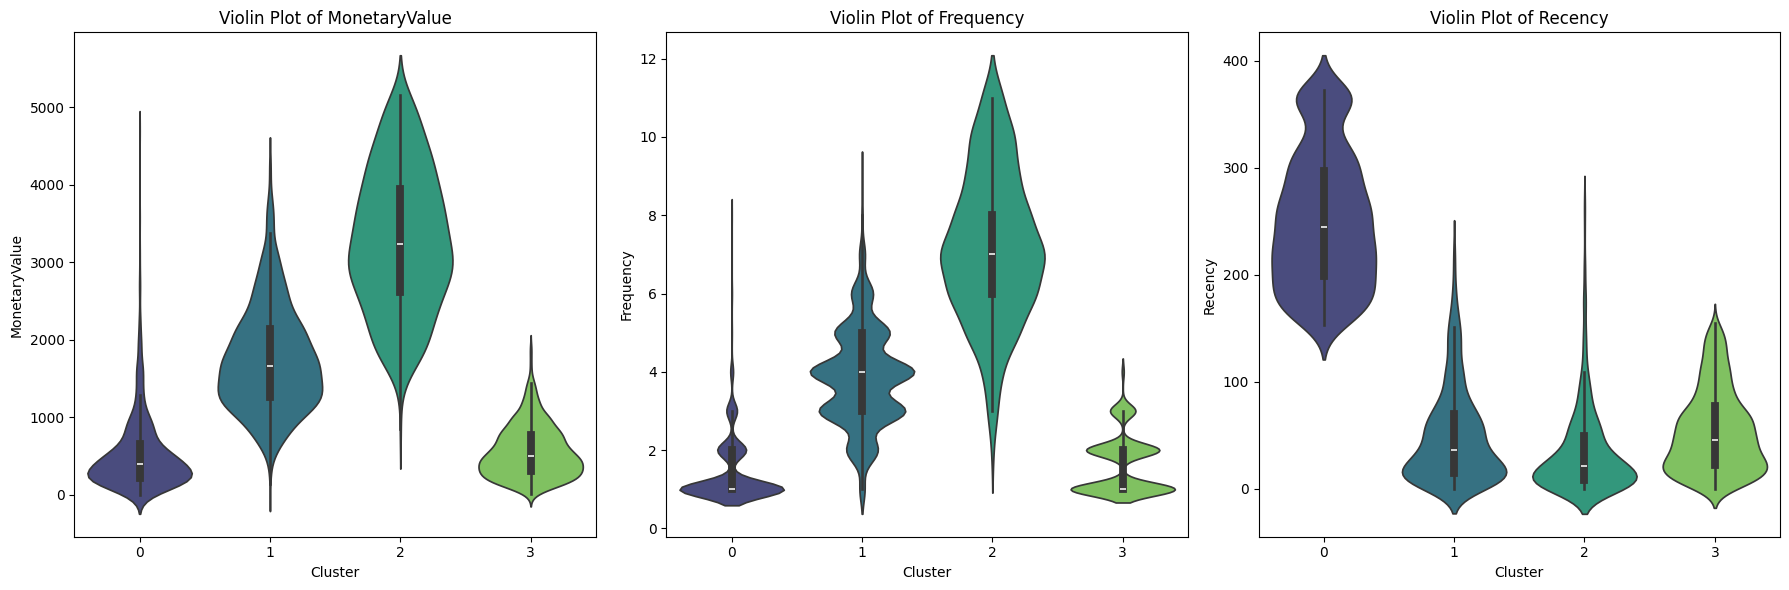

In [60]:
plt.figure(figsize=(18, 6))

# Plot for 'MonetaryValue'
plt.subplot(1, 3, 1)
sns.violinplot(x='Cluster', y='MonetaryValue', data=data_noneOutliers, palette='viridis')
plt.title('Violin Plot of MonetaryValue')
plt.xlabel('Cluster')
plt.ylabel('MonetaryValue')

# Plot for 'Frequency'
plt.subplot(1, 3, 2)
sns.violinplot(x='Cluster', y='Frequency', data=data_noneOutliers, palette='viridis')
plt.title('Violin Plot of Frequency')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

# Plot for 'Recency'
plt.subplot(1, 3, 3)
sns.violinplot(x='Cluster', y='Recency', data=data_noneOutliers, palette='viridis')
plt.title('Violin Plot of Recency')
plt.xlabel('Cluster')
plt.ylabel('Recency')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [64]:
# Outlier Clusters

overlap= monValue_outlier.index.intersection(frequency_outlier.index)

monetary_only= monValue_outlier.drop(overlap)

frequency_only = frequency_outlier.drop(overlap)

monetary_and_frequency_out= monValue_outlier.loc[overlap]

In [66]:
# Assign clusters to outliers

monetary_only['Cluster']= -1
frequency_only['Cluster']=-2
monetary_and_frequency_out['Cluster']=-3

outlier_cluster_df= pd.concat([monetary_only,frequency_only,monetary_and_frequency_out])

In [67]:
outlier_cluster_df

,Customer ID,MonetaryValue,Frequency,LastInvoice,Recency,Cluster
9,12357.0,15272.7864,1,2023-11-16 10:05:00,23,-1
25,12380.0,6504.6624,4,2023-08-31 14:54:00,100,-1
42,12409.0,16791.4032,4,2023-10-15 10:24:00,55,-1
48,12415.0,26477.6224,4,2023-11-29 15:07:00,10,-1
61,12431.0,5637.9072,11,2023-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.0,10076.5256,12,2023-11-17 12:20:00,22,-3
4236,18225.0,10261.3904,15,2023-12-09 15:46:00,0,-3
4237,18226.0,9045.1288,15,2023-11-26 15:51:00,13,-3
4241,18231.0,6516.8480,23,2023-10-29 14:17:00,41,-3


C:\Users\rashe\AppData\Local\Temp\ipykernel_5344\3771609869.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='MonetaryValue', data=outlier_cluster_df, palette='viridis')
C:\Users\rashe\AppData\Local\Temp\ipykernel_5344\3771609869.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='Frequency', data=outlier_cluster_df, palette='viridis')
C:\Users\rashe\AppData\Local\Temp\ipykernel_5344\3771609869.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='Recency', data=outlier_cluster_df, p

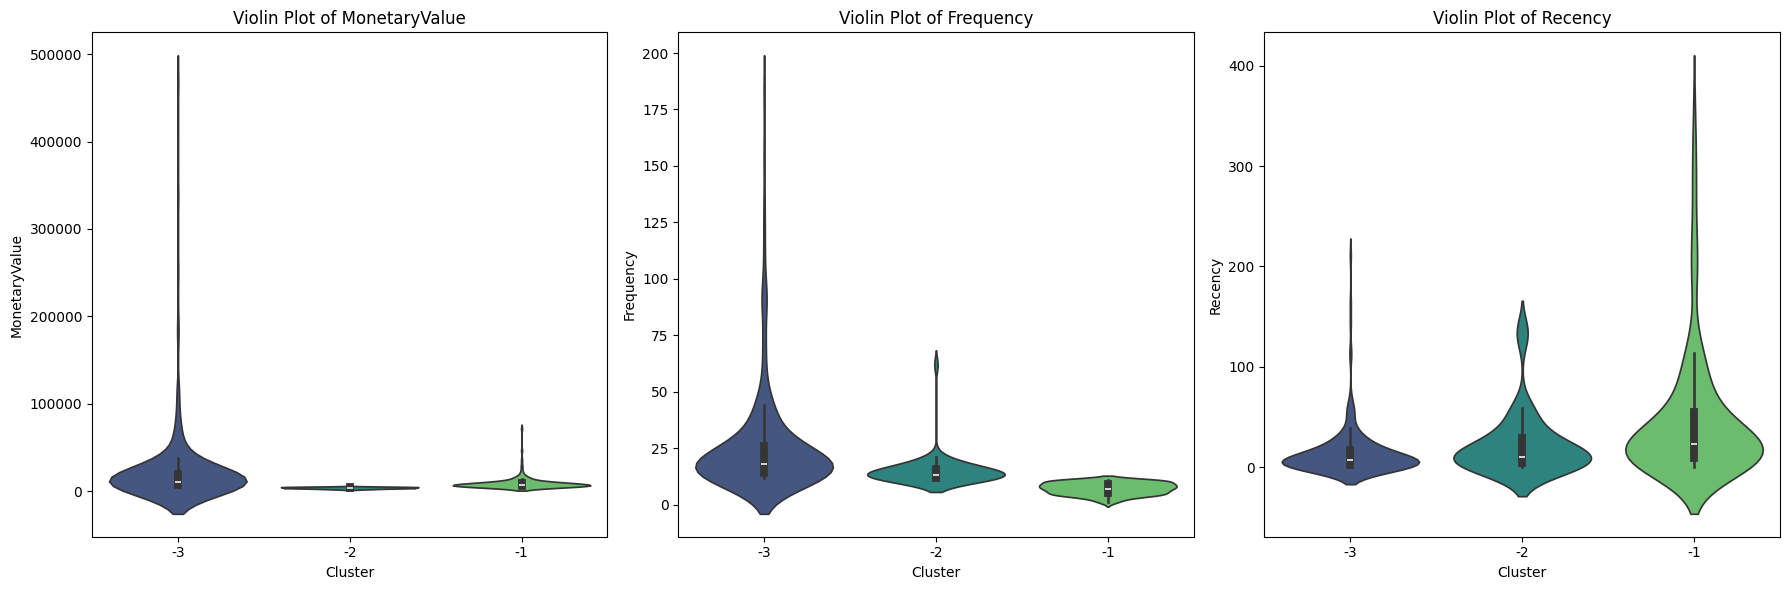

In [69]:
plt.figure(figsize=(18, 6))

# Plot for 'MonetaryValue'
plt.subplot(1, 3, 1)
sns.violinplot(x='Cluster', y='MonetaryValue', data=outlier_cluster_df, palette='viridis')
plt.title('Violin Plot of MonetaryValue')
plt.xlabel('Cluster')
plt.ylabel('MonetaryValue')

# Plot for 'Frequency'
plt.subplot(1, 3, 2)
sns.violinplot(x='Cluster', y='Frequency', data=outlier_cluster_df, palette='viridis')
plt.title('Violin Plot of Frequency')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

# Plot for 'Recency'
plt.subplot(1, 3, 3)
sns.violinplot(x='Cluster', y='Recency', data=outlier_cluster_df, palette='viridis')
plt.title('Violin Plot of Recency')
plt.xlabel('Cluster')
plt.ylabel('Recency')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()